# Lab1
## Practical Entanglement Distillation – Model Development

# Introduction
Provide an introduction to quantum computer networks, focusing on their architecture,
key components, and their significance in modern quantum communication.



# Overview of Practical Entanglement Distillation
Discuss the concept of entanglement distillation, its role in quantum communication, and
practical techniques employed to enhance entanglement fidelity.

# Key Distinctions: Quantum vs. Classical Communication Networks
Highlight the critical differences between quantum and classical communication
networks, focusing on features such as entanglement, superposition, quantum key
distribution, and error correction.

# Methodology for Formulating an Optimization Model for Entanglement Distillation
Present a systematic methodology for creating a model to optimize entanglement
distillation.

# Python-Based Optimization Model Development
Develop an optimization model using Python. Employ any relevant libraries (e.g., Qiskit,
Cirq, PennyLane). The model may incorporate a single objective function, such as
Transmission Fidelity or Probability of Success.

In [59]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, Statevector, partial_trace, state_fidelity
from qiskit_aer.noise import NoiseModel, depolarizing_error
import numpy as np

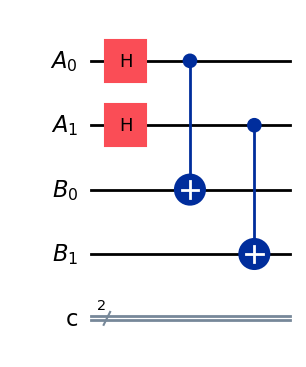

In [71]:
# Create a clean Bell state
A = QuantumRegister(2, 'A')
B = QuantumRegister(2, 'B')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(A, B, c)

# Label qubits for clarity
#A0, B0, A1, B1 = 0, 1, 2, 3

# Initialize Bell states
qc.h(A[0])
qc.cx(A[0], B[0])

qc.h(A[1])
qc.cx(A[1], B[1])

qc.draw('mpl')


In [63]:
state = Statevector.from_instruction(qc)
state.draw("latex")

<IPython.core.display.Latex object>

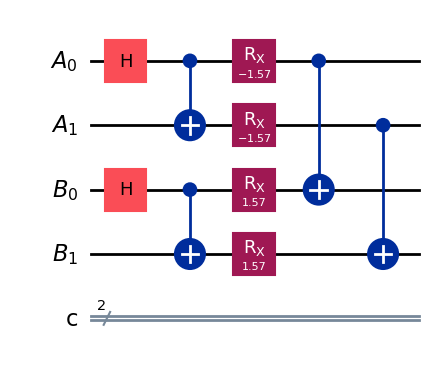

In [65]:
# Apply Rx(pi/2) gates
qc.rx(-3.14159 / 2, A0)  # Alice's operation
qc.rx(3.14159 / 2, A1)   # Alice's operation

qc.rx(-3.14159 / 2, B0)  # Bob's operation
qc.rx(3.14159 / 2, B1)   # Bob's operation

# Apply CNOT gates
qc.cx(A0, A1)
qc.cx(B0, B1)

qc.draw('mpl')


In [67]:
state = Statevector.from_instruction(qc)
state.draw("latex")

<IPython.core.display.Latex object>

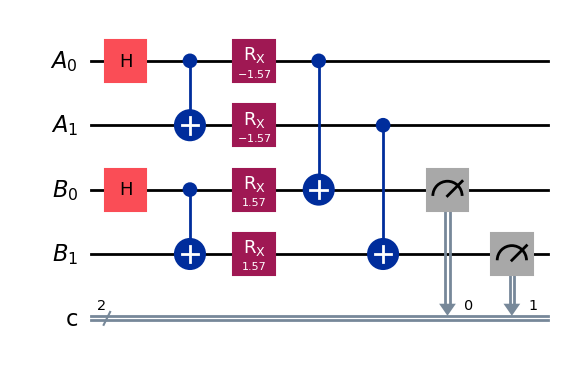

In [69]:
# Measure target qubits
qc.measure(A[1], 0)
qc.measure(B[1], 1)
qc.draw('mpl')


In [41]:


sim = Aer.get_backend('qasm_simulator')
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Post-select on the desired outcome (e.g., '00' or '11')
desired_outcomes = ['00', '11']
success_count = sum(counts.get(key, 0) for key in desired_outcomes)
success_rate = success_count / 1024

print(success_rate)

1.0


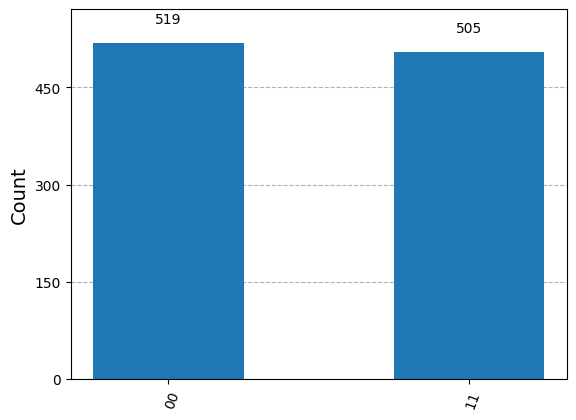

In [43]:
plot_histogram(counts)

In [8]:
# Add depolarizing noise
noise_level=0.1
noise_model = NoiseModel()

# Define single-qubit depolarizing error
single_qubit_error = depolarizing_error(noise_level, 1)

# Define two-qubit depolarizing error
two_qubit_error = depolarizing_error(noise_level, 2)

# Add noise to the noise model
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['h', 'cx']
  All-qubits errors: ['h', 'cx']


In [11]:
sim = Aer.get_backend('statevector_simulator')
job = sim.run(qc, shots=1024, noise_model=noise_model)
result = job.result()

# Get the counts
print(result.get_counts())
print(DensityMatrix(result.get_statevector()))

{np.str_('00'): np.float64(0.5), np.str_('11'): np.float64(0.5)}
DensityMatrix([[ 0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j, -0. +0.j],
               [ 0. -0.j,  0. -0.j,  0. +0.j,  0. +0.j],
               [-0.5+0.j, -0. +0.j,  0. -0.j,  0.5+0.j]],
              dims=(2, 2))


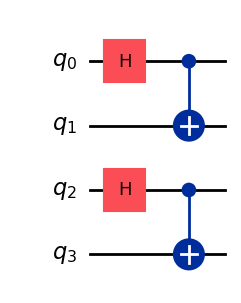

In [23]:
qc2 = QuantumCircuit(4)

# Initial Bell states for two pairs (qubits 0-1, 2-3)
qc2.h(0)
qc2.cx(0, 1)
qc2.h(2)
qc2.cx(2, 3)

qc2.draw('mpl')

In [25]:
state = Statevector.from_instruction(qc2)
state.draw("latex")

<IPython.core.display.Latex object>

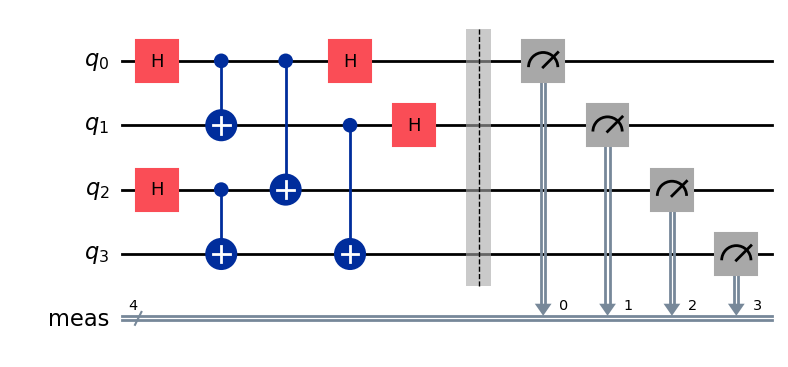

In [27]:
# DEJMPS operations: CNOT and rotations
qc2.cx(0, 2)  # CNOT between the first qubits of both pairs
qc2.cx(1, 3)  # CNOT between the second qubits of both pairs
qc2.h(0)
qc2.h(1)

# Measurement for post-selection
qc2.measure_all()
qc2.draw('mpl')

In [33]:
sim = Aer.get_backend('statevector_simulator')
job = sim.run(qc2, shots=1024)
result = job.result()
counts = result.get_counts()

# Post-select on the desired outcome (e.g., '0000' or '1111')
desired_outcomes = ['0000', '1111']
success_count = sum(counts.get(key, 0) for key in desired_outcomes)
success_rate = success_count / 1024

print(success_rate)
# Assume distilled state fidelity improves after post-selection
# In reality, distilled state must be recalculated
#distilled_state = create_noisy_bell_state(noise_level=0.05)


0.490234375


In [71]:
# Putting it all together
# Define the ideal target state (Bell state)
bell_qc = QuantumCircuit(2)
bell_qc.h(0)
bell_qc.cx(0, 1)
target_state = Statevector.from_instruction(bell_qc)


In [ ]:

# Create noisy state
noisy_state = create_noisy_bell_state(noise_level=0.1)

# Apply DEJMPS protocol (simulate)
success_rate, distilled_state = simulate_dejmps(noisy_state)

# Calculate fidelity
fidelity = calculate_fidelity(distilled_state, target_state)

print("Success Rate:", success_rate)
print("Fidelity:", fidelity)

In [139]:
qc = QuantumCircuit(4, 4)  # 4 qubits for two rounds
    
# Round 1: Initial Bell states
qc.h(0)
qc.cx(0, 1)
qc.h(2)
qc.cx(2, 3)

# DEJMPS round 1 operations
qc.cx(0, 2)  # CNOT q0 → q2
qc.cx(1, 3)  # CNOT q1 → q3
qc.h(0)
qc.h(1)

full_state = partial_trace(Statevector.from_instruction(qc), [2, 3])
full_state.draw("latex")

<IPython.core.display.Latex object>

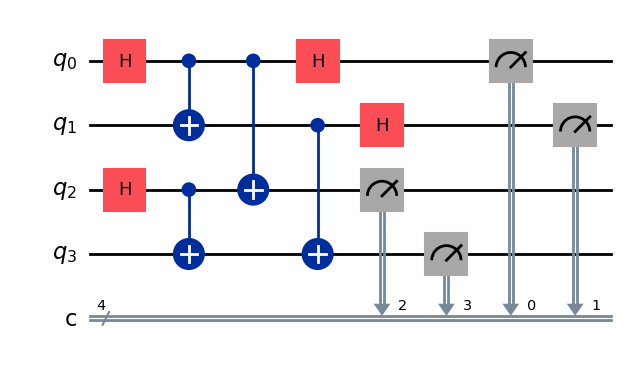

In [145]:
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

qc.draw('mpl')

In [147]:
sim = Aer.get_backend('statevector_simulator')
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Post-select on the desired outcome (e.g., '0000' or '1111')
desired_outcomes = ['0000', '1111']
success_count = sum(counts.get(key, 0) for key in desired_outcomes)
success_rate = success_count / 1024

print(success_rate)

0.5146484375


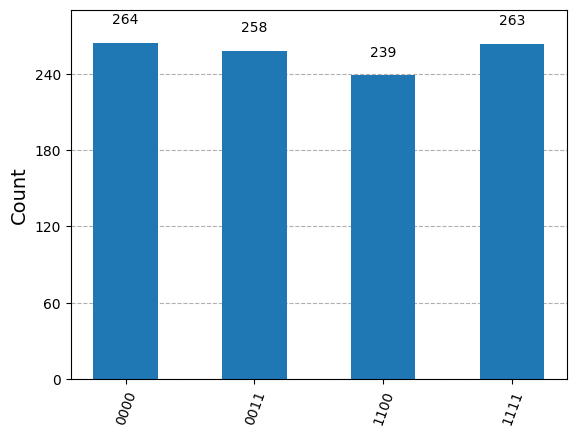

In [149]:
plot_histogram(counts)

In [151]:
# Define the ideal target state (Bell state)
bell_qc = QuantumCircuit(2)
bell_qc.h(0)
bell_qc.cx(0, 1)
Statevector.from_instruction(bell_qc).draw("latex")


<IPython.core.display.Latex object>

In [153]:
target_state = DensityMatrix(Statevector.from_instruction(bell_qc))
target_state.draw("latex")

<IPython.core.display.Latex object>

In [155]:

# Calculate fidelity with the target state
fidelity = state_fidelity(full_state, target_state)
print(fidelity)

0.9999999999999993


In [161]:
# Round 2: New Bell pair
qc.reset([2, 3])  # Reset qubits 2 and 3 for the new pair
qc.h(2)
qc.cx(2, 3)

# DEJMPS round 2 operations
qc.cx(0, 2)  # CNOT q0 → q2
qc.cx(1, 3)  # CNOT q1 → q3
qc.h(0)
qc.h(1)

#full_state = partial_trace(Statevector.from_instruction(qc), [2, 3])
#full_state.draw("latex")



In [ ]:
# Calculate fidelity with the target state
fidelity = state_fidelity(full_state, target_state)
print(fidelity)

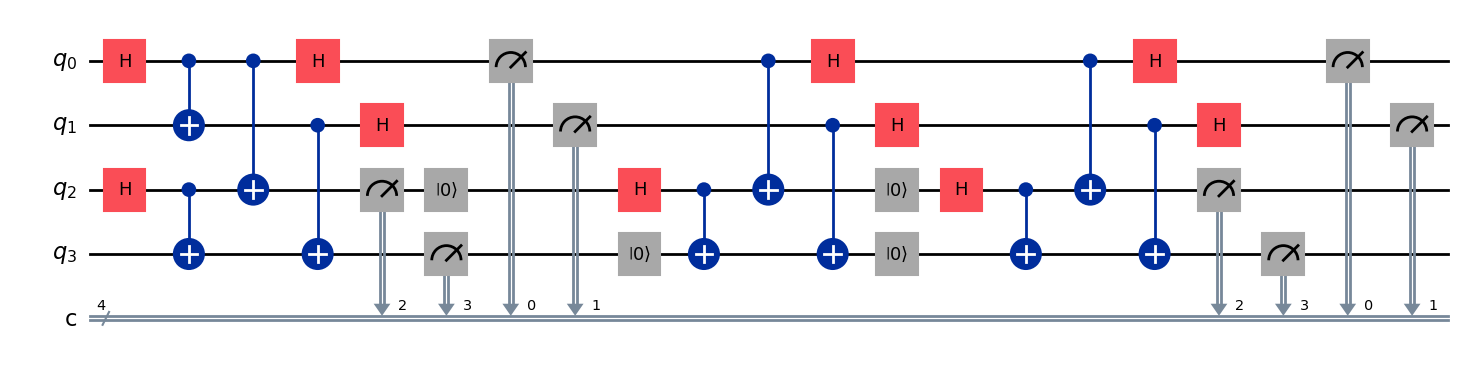

In [163]:
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])  # Final measurement for post-selection

qc.draw('mpl')

In [165]:
sim = Aer.get_backend('statevector_simulator')
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Post-select on the desired outcome (e.g., '0000' or '1111')
desired_outcomes = ['0000', '1111']
success_count = sum(counts.get(key, 0) for key in desired_outcomes)
success_rate = success_count / 1024

print(success_rate)

0.240234375


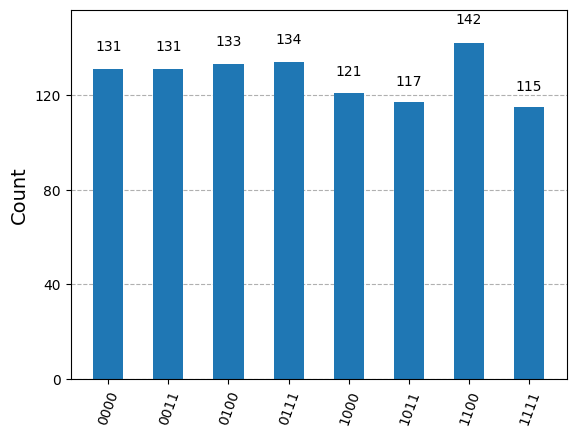

In [167]:
plot_histogram(counts)

In [73]:
# Define fidelity and create the ideal Bell state
fidelity = 0.7

# Define the Bell state (|Φ+⟩)
bell_state = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
ideal_bell_state = np.outer(bell_state, bell_state.conj())

# Create a maximally mixed state
maximally_mixed = DensityMatrix(np.eye(4) / 4)

# Add noise by mixing the ideal Bell state with a maximally mixed state
noisy_bell_dm_array = fidelity * ideal_bell_state + (1 - fidelity) * maximally_mixed.data
noisy_bell_dm = DensityMatrix(noisy_bell_dm_array)

# Create the quantum circuit for DEJMPS operation
qc = QuantumCircuit(2)

# Initialize with the noisy Bell state
qc.initialize(noisy_bell_dm.data.flatten(), [0, 1])


QiskitError: 'Sum of amplitudes-squared is not 1, but 0.7858116822750854.'

In [ ]:
noise models: https://docs.quantum.ibm.com/guides/build-noise-models